In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print dataset shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define function to create a model with a specific activation function
def create_model(activation_function):
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 784-dimensional vectors
        Dense(128, activation=activation_function),  # First hidden layer with 128 neurons
        Dense(64, activation=activation_function),   # Second hidden layer with 64 neurons
        Dense(10, activation='softmax')  # Output layer with 10 neurons for classification
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model


In [3]:
import time

# Train the model and track training time
def train_and_evaluate(activation_function):
    model = create_model(activation_function)
    start_time = time.time()  # Start timing
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    training_time = time.time() - start_time  # Calculate total training time
    return history, training_time


In [4]:
# Compare performance for different activation functions
activations = ['relu', 'sigmoid', 'tanh']
results = {}

for activation in activations:
    print(f"\nTraining with {activation} activation...")
    history, training_time = train_and_evaluate(activation)
    results[activation] = {
        'history': history,
        'training_time': training_time,
        'accuracy': history.history['val_accuracy'][-1]  # Get accuracy from last epoch
    }



Training with relu activation...


C:\Users\vedan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training with sigmoid activation...

Training with tanh activation...


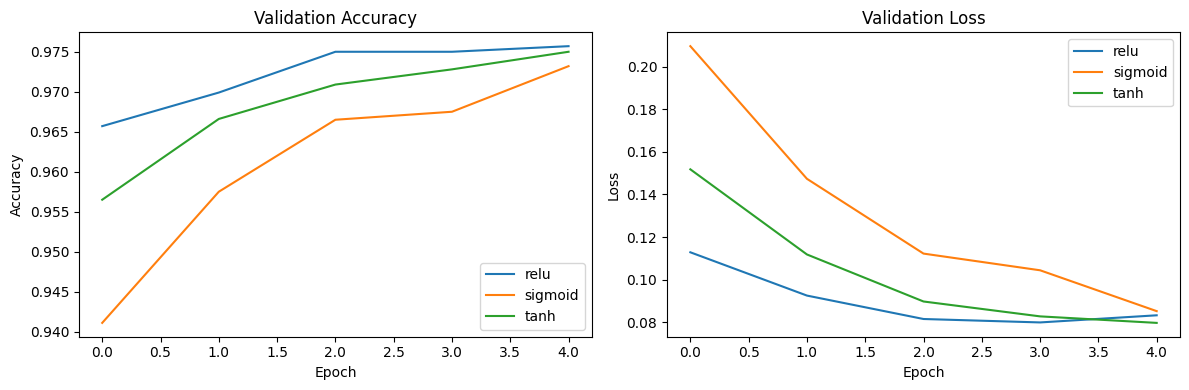

In [5]:
import matplotlib.pyplot as plt

# Plotting the results
def plot_results(results):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for activation in results:
        plt.plot(results[activation]['history'].history['val_accuracy'], label=activation)
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    for activation in results:
        plt.plot(results[activation]['history'].history['val_loss'], label=activation)
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display the results
plot_results(results)


In [6]:
# Print final accuracy and training time for each activation function
for activation in results:
    print(f"{activation.capitalize()} - Accuracy: {results[activation]['accuracy']:.4f}, Training Time: {results[activation]['training_time']:.2f} seconds")


Relu - Accuracy: 0.9757, Training Time: 27.01 seconds
Sigmoid - Accuracy: 0.9732, Training Time: 25.19 seconds
Tanh - Accuracy: 0.9750, Training Time: 23.97 seconds
